<a href="https://colab.research.google.com/github/elijahsk/CS5242/blob/master/cs5242_mnist_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, you will implement the logisitc regression model for classifying images for digit 0 and 1.

Please add the code for places marked by **TODO**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data
Using SciKit-Learns ```fetch_openml``` to load MNIST data.

In [0]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', cache=False)
mnist.data.shape

(70000, 784)

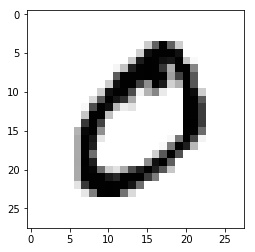

In [0]:
plt.imshow(mnist.data[1].reshape(28, 28), cmap=plt.cm.binary)

## Preprocessing Data

Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.<br />

The above ```featch_mldata``` method to load MNIST returns ```data``` and ```target``` as ```uint8``` which we convert to ```float32``` and int64 respectively. 

We firstly select and shuffle the images with label 0 and 1 for the logistic regression. And then we normalize the data into range [0,1] for numerical stability while computing. Finally, we split data into train (80%) adnd test (20%) to indicate the performance of logistic regression during optimization.

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np


X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

X = np.concatenate([X[np.where(y==0)[0]], X[np.where(y==1)[0]]], axis=0)
y = np.concatenate([np.zeros(sum(y==0)), np.ones(sum(y==1))], axis=0)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)

X train shape (11824, 784)
y train shape (11824,)


## Defining Model

Define the logistic regression, including the estimated probability and loss function

In [0]:
def logistic(w, X):
    # Todo compute the probability that each image is labeled as 1
    # w: (n, ), X: (m, n)
    
    return 

def binary_cross_entropy(p, y, eps=1e-6):
    # following * operation is element-wise multiplication   
    # p, y: (m, )
    return np.sum(- y * np.log (p + eps) - (1-y)*np.log(1-p+eps)) / len(y)

def accuracy(probs, target):
    # probs: probability that each image is labeled as 1
    # target: ground truth label
    # both are vectors of shape (m, )
    
    prediction = probs >= 0.5    
    acc = np.mean(prediction == target)
    return acc * 100

def forward(w, X, y):
    # compute the accuracy and loss
    
    probs = logistic(w, X)
    acc = accuracy(probs, y)    
    loss = binary_cross_entropy(probs, y)    
    return acc, loss

## Computing Gradients

Define the function to compute the gradients to parameters of logistic regression

In [0]:
def gradient(w, X, y):
    # TODO compute the gradient of the loss w.r.t w
    # w: vector (n,)
    # X: matrix (m, n)
    # y: vector (m,)
    
    return dw
    

## Initializing and Training

Initialize parameters with Gaussian distribution (mean=0, std=0.1). And then define the training and testing function. After these, we can start training.

In [0]:
w = np.random.normal(loc=0.0, scale=0.1, size=(784,))

In [0]:
def train_logistic(w, X_train, y_train, X_test, y_test, epochs, lr=0.01):
    
    metrics = [] # to store intermediate results during optimization

    for i in range(epochs):
        print(f"==> epoch {i+1}")
        
        train_acc, train_loss = forward(w, X_train, y_train)        
        test_acc, test_loss = forward(w, X_test, y_test)
        print("train acc = %.2f%%, train loss = %.4f | test acc = %.2f%%, test loss = %.4f" %(train_acc, train_loss, test_acc, test_loss))
        
        metrics += [[train_acc, train_loss, test_acc, test_loss]] # to store intermediate results

        # to get the gradient to weight and update it (!!! need to be finished by students)
        dw = gradient(w, X_train, y_train)
        # TODO update w based on dw
        

    return metrics

In [0]:
metrics = train_logistic(w, X_train, y_train, X_test, y_test, epochs=20, lr=0.1)

==> epoch 1
train acc = 53.65%, train loss = 0.7398 | test acc = 52.77%, test loss = 0.7475
==> epoch 2
train acc = 82.59%, train loss = 0.4466 | test acc = 81.06%, test loss = 0.4531
==> epoch 3
train acc = 90.87%, train loss = 0.3382 | test acc = 90.70%, test loss = 0.3432
==> epoch 4
train acc = 94.50%, train loss = 0.2717 | test acc = 94.18%, test loss = 0.2757
==> epoch 5
train acc = 96.02%, train loss = 0.2272 | test acc = 95.74%, test loss = 0.2305
==> epoch 6
train acc = 96.83%, train loss = 0.1956 | test acc = 96.72%, test loss = 0.1984
==> epoch 7
train acc = 97.46%, train loss = 0.1720 | test acc = 97.36%, test loss = 0.1746
==> epoch 8
train acc = 97.94%, train loss = 0.1539 | test acc = 97.83%, test loss = 0.1562
==> epoch 9
train acc = 98.26%, train loss = 0.1395 | test acc = 98.14%, test loss = 0.1417
==> epoch 10
train acc = 98.42%, train loss = 0.1277 | test acc = 98.34%, test loss = 0.1298
==> epoch 11
train acc = 98.66%, train loss = 0.1180 | test acc = 98.48%, test 

## Visualization


(20, 4)


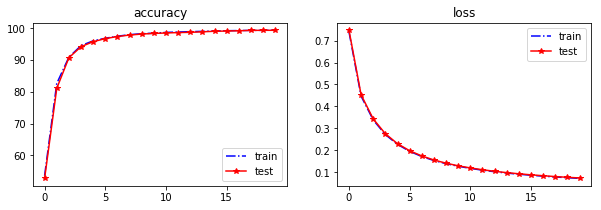

In [0]:
metrics = np.array(metrics)
print(metrics.shape)

epochs = len(metrics)
x = range(epochs)


plt.figure(figsize=(10,3))
plt.subplot(121)
plt.title('accuracy')
plt.plot(x, metrics[:,0], 'b-.', label='train')
plt.plot(x, metrics[:,2], 'r-*', label='test')
plt.legend()

plt.subplot(122)
plt.title('loss')
plt.plot(x, metrics[:,1], 'b-.', label='train')
plt.plot(x, metrics[:,3], 'r-*', label='test')
plt.legend()
plt.show()